https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

In [ ]:
!unzip Data.zip

Archive:  Data.zip
replace test/COVID19/COVID19(460).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
image_height, image_width = 256, 256
batch_size = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    "Data/train",
    image_size=(image_height, image_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "Data/test",
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 3899 files belonging to 3 classes.
Found 1288 files belonging to 3 classes.


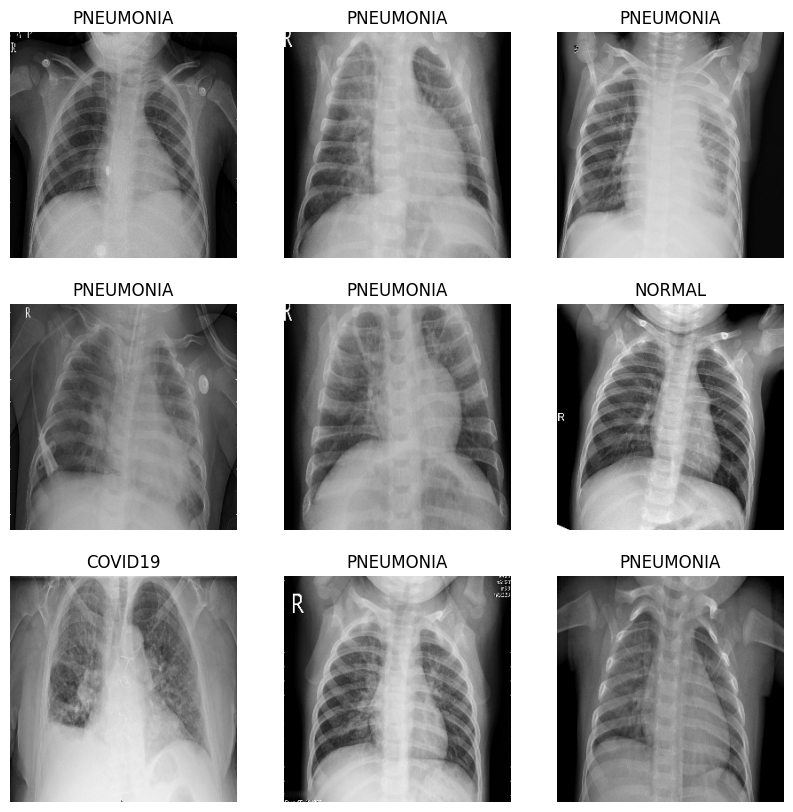

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))

for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(len(class_names))
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [ ]:
model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9650 - loss: 0.0884 - val_accuracy: 0.9433 - val_loss: 0.1691
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9806 - loss: 0.0555 - val_accuracy: 0.9348 - val_loss: 0.1984
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9873 - loss: 0.0418 - val_accuracy: 0.9371 - val_loss: 0.2336
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9852 - loss: 0.0446 - val_accuracy: 0.9340 - val_loss: 0.2012
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9836 - loss: 0.0437 - val_accuracy: 0.9464 - val_loss: 0.1759
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9867 - loss: 0.0343 - val_accuracy: 0.9146 - val_loss: 0.3426
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9955 - loss: 0.0177 - val_accuracy: 0.9472 - val_loss: 0.1973
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9464 - val_loss:

In [ ]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9380 - loss: 0.2237


[0.24018342792987823, 0.9340062141418457]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("chestxray.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpb2x_s6b5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134255484082784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255484089824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255484089296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255110588016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255110601216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255108747360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255487733776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255484082960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255484079440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134255108746656: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
 train_ds.class_names

['COVID19', 'NORMAL', 'PNEUMONIA']